In [ ]:
import random
import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath(".."))
import time_series_generator.core as tsg
import time_series_generator.config as cfg 

In [6]:
try:
    data_df = pd.read_csv("/home/lisa4090/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/modified_data/resample_data.csv")
except:
    data_df = pd.read_csv("/Users/dingjunwei/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/time_series_generator/modified_data/resample_data.csv")

# Seed Searching: A code to search continous series 
df = data_df.copy()

df['time'] = pd.to_datetime(df['Unnamed: 0'])
df = df.rename(columns={'raw_data': 'value'})

mask = df['value'].notna().astype(int)
group_id = (mask != mask.shift()).cumsum()
groups = (
    df.groupby(group_id)
      .agg(start=('time', 'first'),
           end=('time', 'last'),
           length=('value', 'size'),
           valid=('value', lambda x: x.notna().all()))
)
valid_groups = groups[(groups['valid']) & (groups['length'] >= 48)]

segments = []
for gid in valid_groups.index:
    seg = df[group_id == gid].reset_index(drop=True)
    segments.append(seg)

segments[0]['value'].values[:cfg.WINDOW_SIZE]

array([ 3.        , 18.        , 21.        , 25.        , 15.4       ,
       20.33333333, 28.6       , 30.5       , 35.66666667, 37.        ,
       37.        , 36.5       , 33.5       , 26.33333333, 10.33333333,
        6.        , 10.        , 14.6       , 19.        , 18.        ,
       15.66666667, 20.66666667, 26.        , 15.28571429])

In [ ]:
values = df['value'].dropna().to_numpy()
values.mean(), values.std()

### Window size: 24 hours

In [ ]:
# Initialize the generator with configuration parameters
daily_generator_random_1 = tsg.Generator(
    window_size=cfg.WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed= cfg.SEED,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

daily_generator_random_2 = tsg.Generator(
    window_size=cfg.WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed= cfg.SEED2,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

In [ ]:
daily_sample_withseed_1 = daily_generator_random_1.generate()
daily_sample_withseed_2 = daily_generator_random_2.generate()

In [ ]:
from turtle import width # Why?
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(daily_sample_withseed_1, axis=0)
std_series = np.nanstd(daily_sample_withseed_1, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), dpi =300)

ax.fill_between(
    np.arange(daily_sample_withseed_1.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.2,
    color="gray",
    label="±1 Std",
    linewidth=0
)

for idx, i in enumerate(daily_sample_withseed_1):
    plt.plot(range(len(i)),i,color='black',alpha=0.15, linewidth=1,label = "Generated Samples" if idx == 0 else "")
    
plt.plot(mean_series, label="Sample Mean", linewidth=1.5, color="blue")
plt.plot(cfg.SEED, label="Generation Seed", linewidth=1.5, color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from turtle import width # Why?
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(daily_sample_withseed_2, axis=0)
std_series = np.nanstd(daily_sample_withseed_2, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), dpi =300)

ax.fill_between(
    np.arange(daily_sample_withseed_2.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.2,
    color="gray",
    label="±1 Std",
    linewidth=0
)

for idx, i in enumerate(daily_sample_withseed_2):
    plt.plot(range(len(i)),i,color='black',alpha=0.15, linewidth=1,label = "Generated Samples" if idx == 0 else "")
    
plt.plot(mean_series, label="Sample Mean", linewidth=1.5, color="blue")
plt.plot(cfg.SEED2, label="Generation Seed", linewidth=1.5, color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

### Window size: 48 hours

In [1]:
import random
import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath(".."))
import time_series_generator.core as tsg
import time_series_generator.config as cfg

In [2]:
two_day_generator_random = tsg.Generator(
    window_size=cfg.WINDOW_SIZE_48,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed= cfg.SEED_48,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

In [3]:
two_day_sample_withseed = two_day_generator_random.generate()

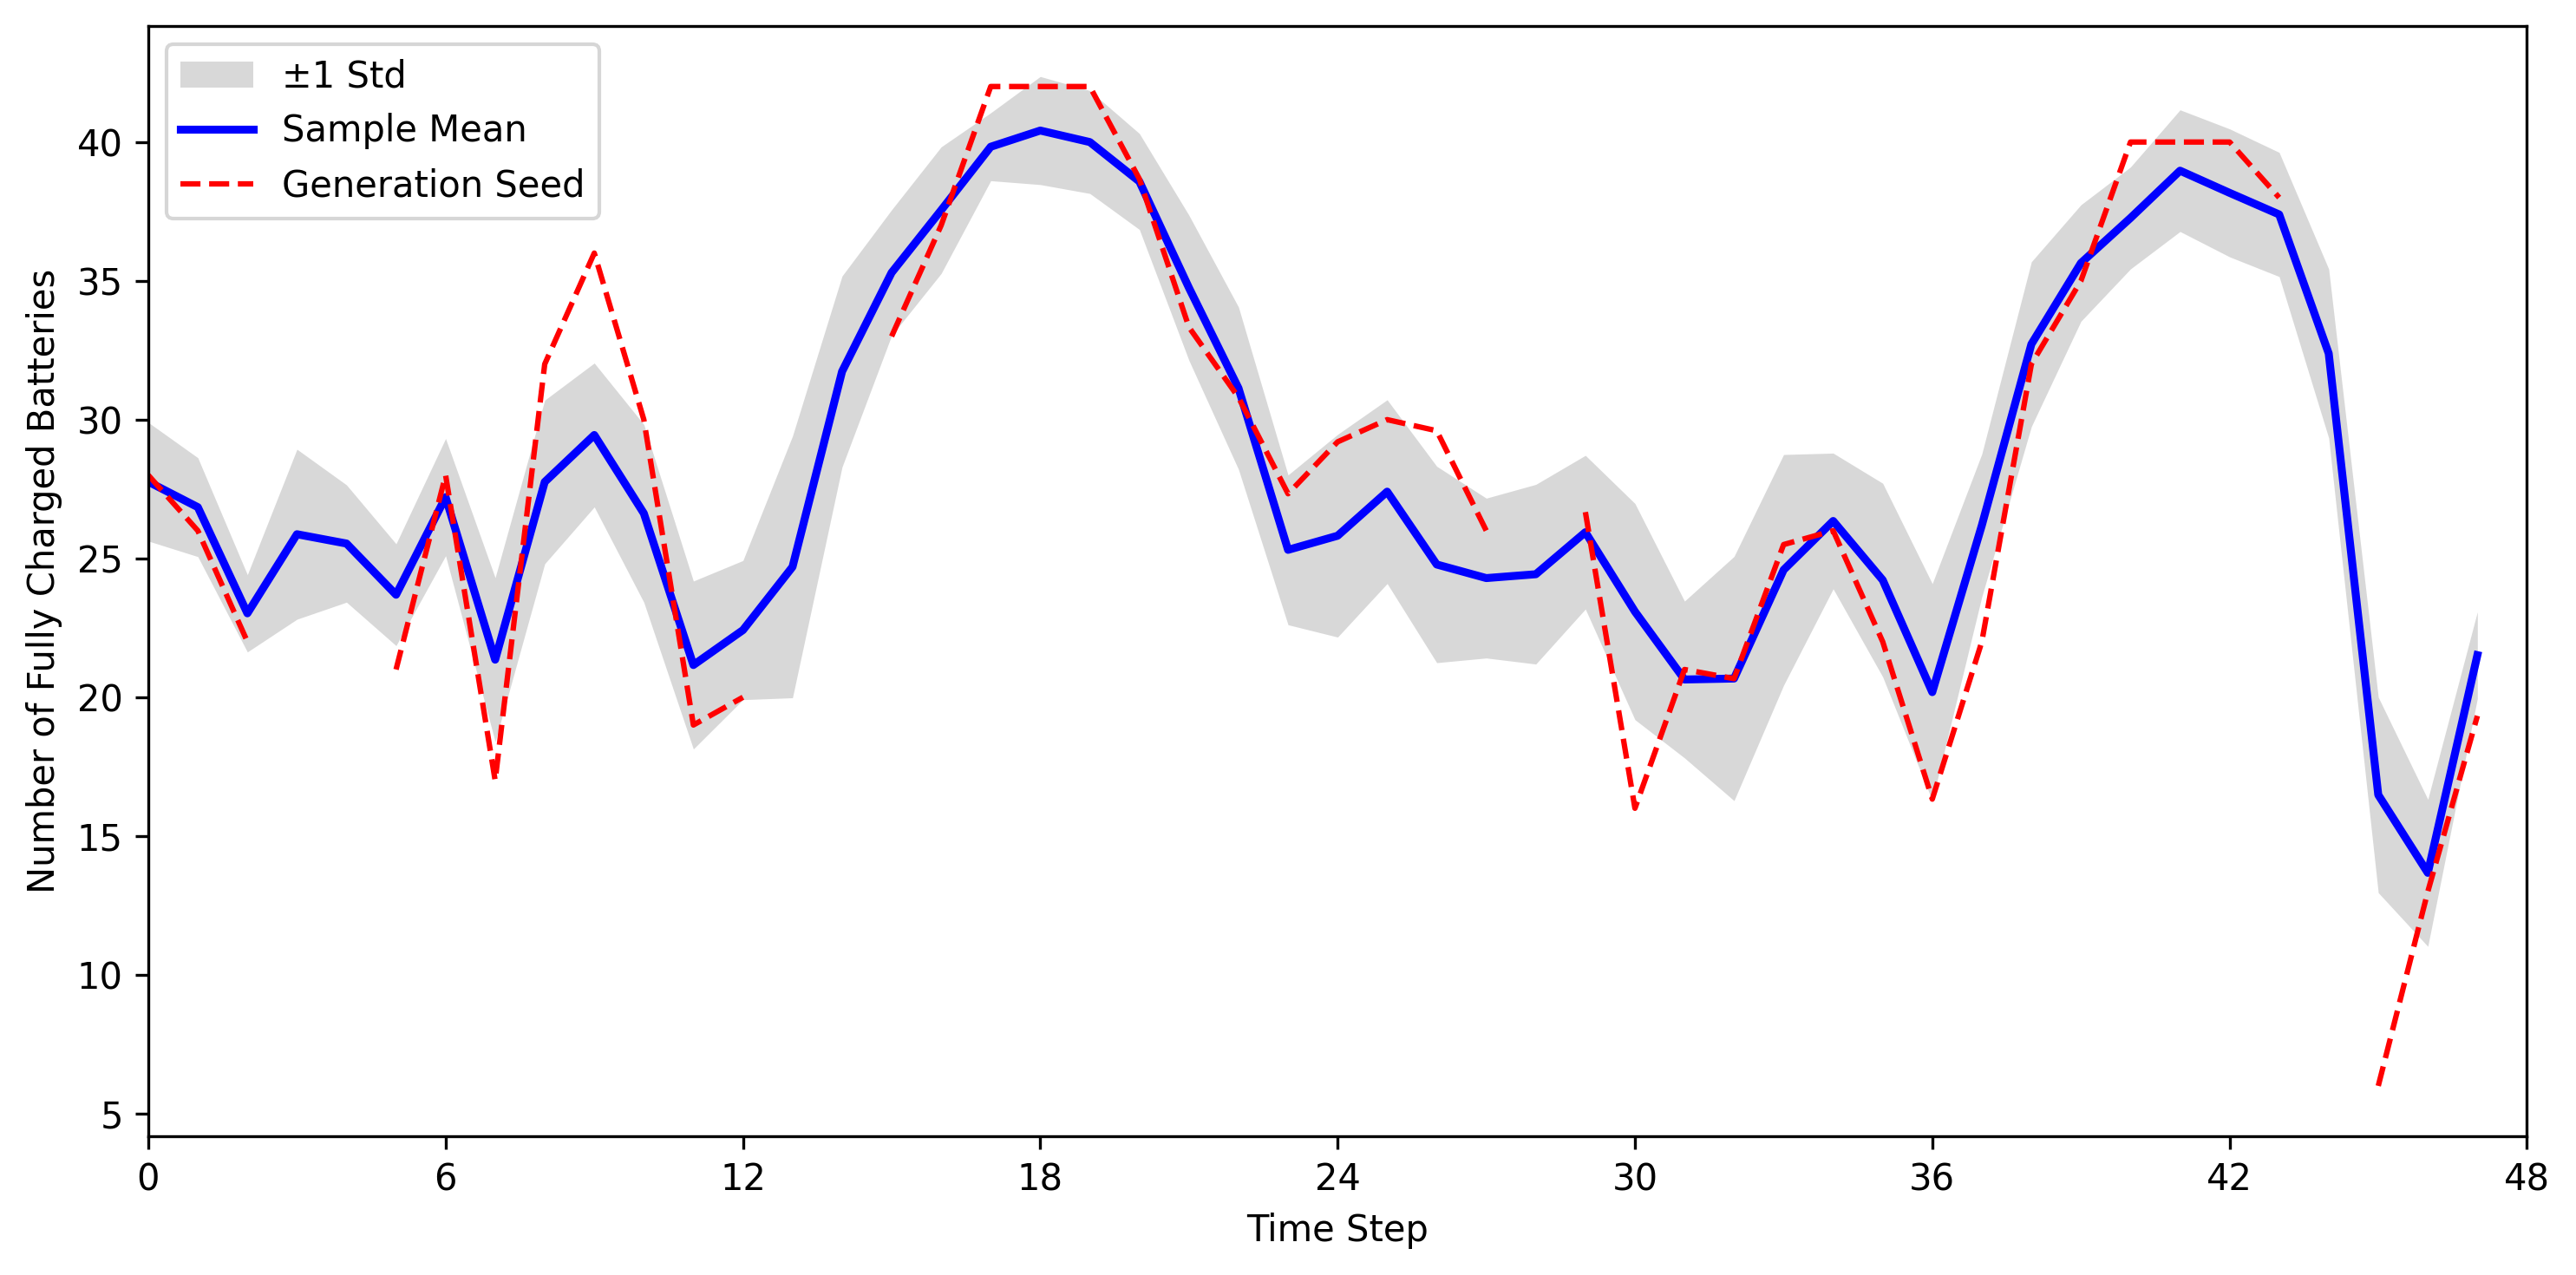

In [4]:
from cProfile import label
from matplotlib import style
import matplotlib.pyplot as plt

mean_series = np.nanmean(two_day_sample_withseed, axis=0)
std_series = np.nanstd(two_day_sample_withseed, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), dpi =300)

ax.fill_between(
    np.arange(two_day_sample_withseed.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.3,
    color="grey",
    label="±1 Std",
    linewidth=0
)

# for idx, i in enumerate(two_day_sample_withseed):
#     plt.plot(range(len(i)),i,color='black',alpha=0.1, linewidth=1.2,label = "Generated Samples" if idx == 0 else "")

plt.plot(mean_series, label="Sample Mean", linewidth=2.2, color="blue", linestyle='-')
plt.plot(cfg.SEED_48, label="Generation Seed", linewidth=1.5, color="red", linestyle='--')

plt.xlabel("Time Step")
plt.ylabel("Number of Fully Charged Batteries")
plt.xticks(np.arange(0, 49, step=6))
plt.xlim(0,48)
plt.legend()
plt.tight_layout()
plt.show()

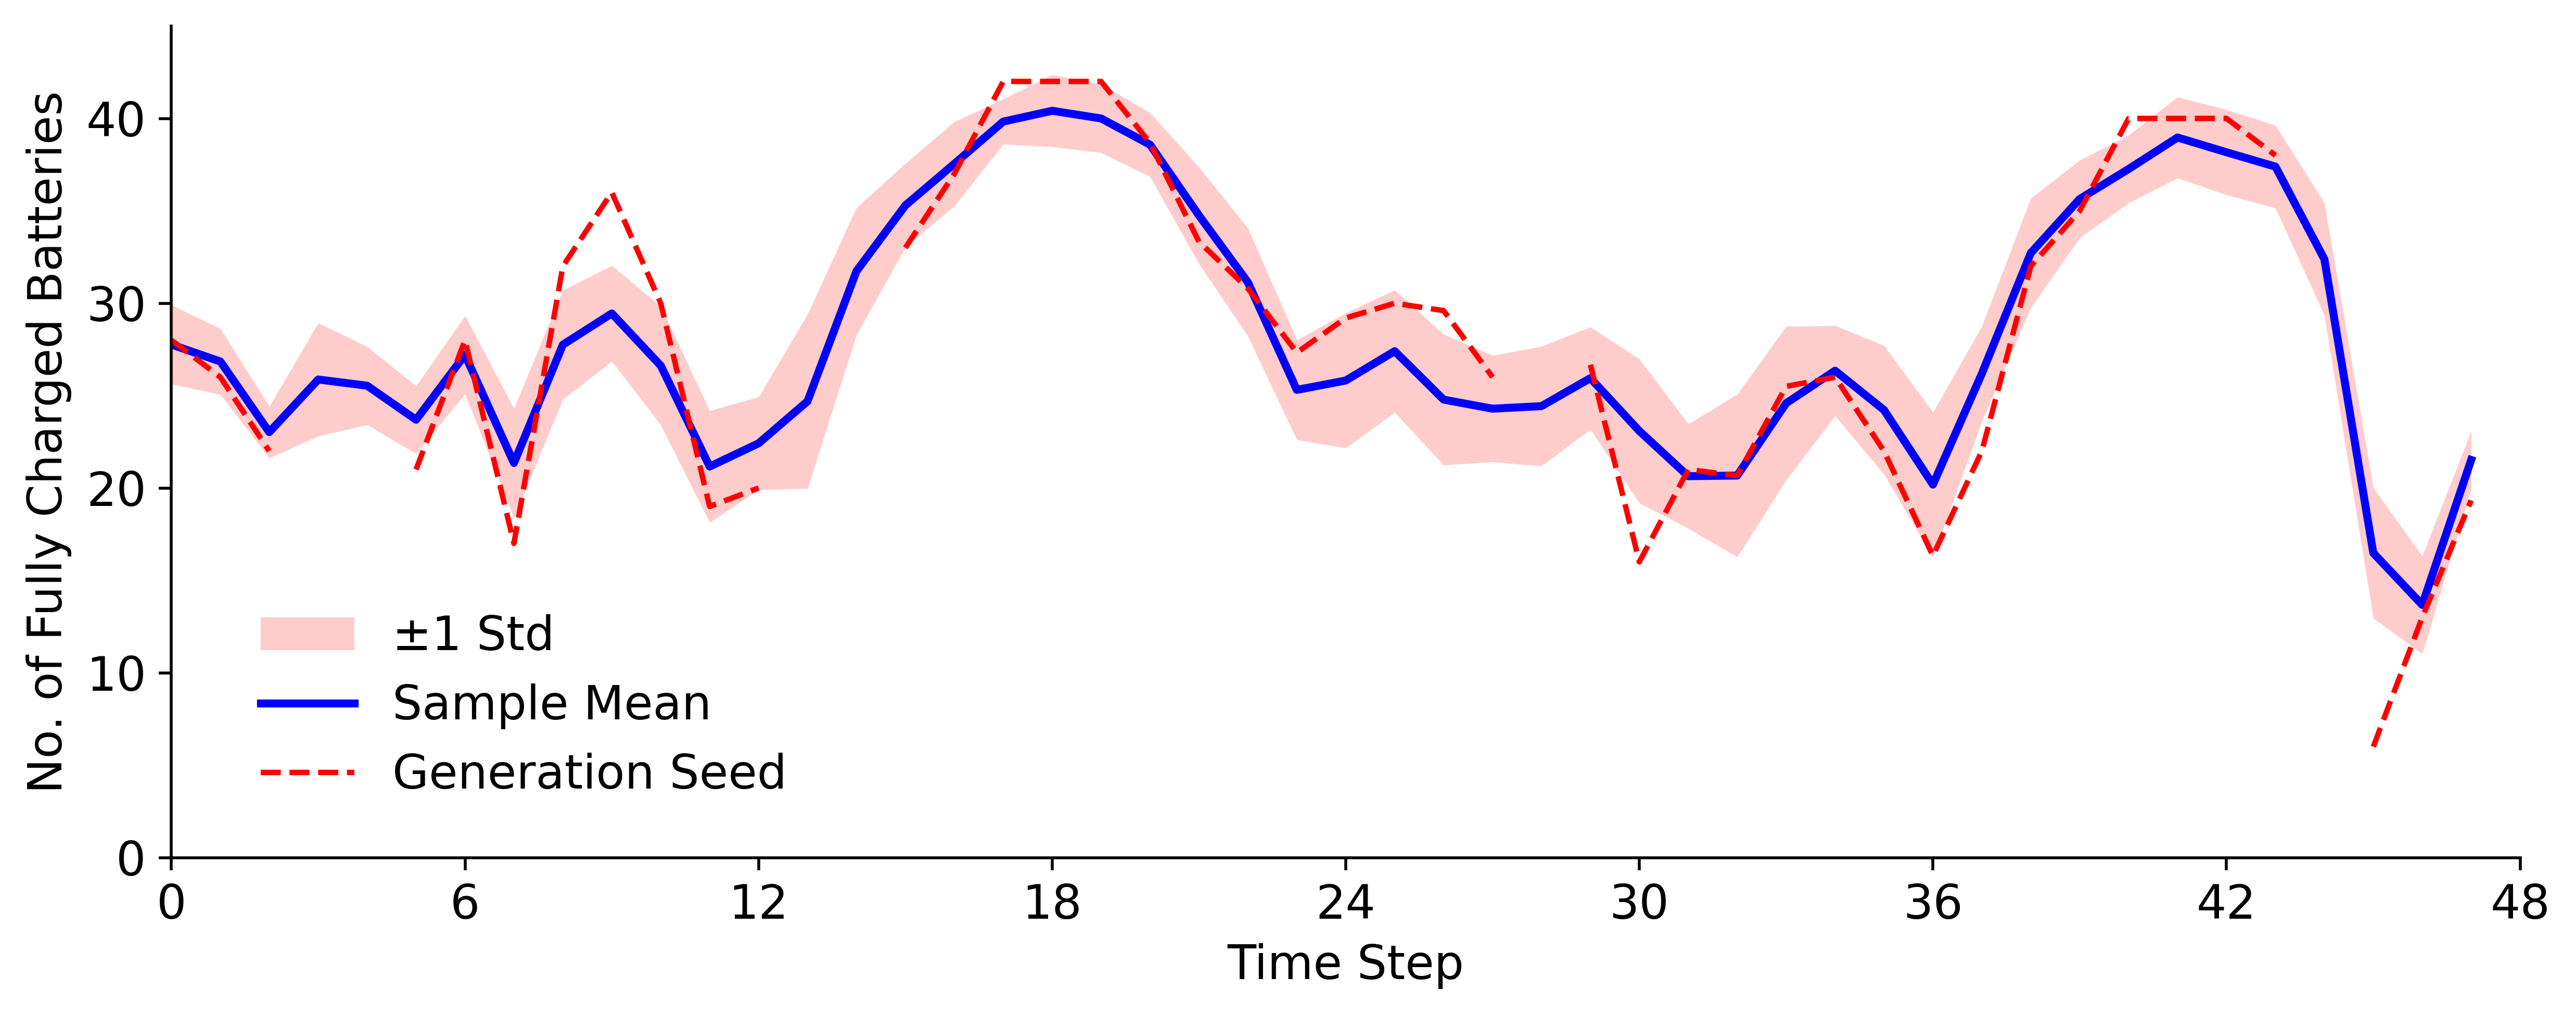

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# === Example Data ===
# mean_series = np.nanmean(two_day_sample_withseed, axis=0)
# std_series = np.nanstd(two_day_sample_withseed, axis=0)
# Replace the above with actual data
# cfg.SEED_48 = ...

# === Font Size Controls ===
FS_LABEL = 13     # axis labels
FS_TICK = 13      # tick labels
FS_LEGEND = 13    # legend text
FS_TITLE = 13     # title (if added)

fig, ax = plt.subplots(figsize=(10, 4), dpi=500)

# ±1 std shaded region
ax.fill_between(
    np.arange(two_day_sample_withseed.shape[1]),
    mean_series - 1 * std_series,
    mean_series + 1 * std_series,
    alpha=0.2,
    color="red",
    label="±1 Std",
    linewidth=0
)

# Mean and seed lines
ax.plot(mean_series, label="Sample Mean", linewidth=2.2, color="blue", linestyle='-')
ax.plot(cfg.SEED_48, label="Generation Seed", linewidth=1.5, color="red", linestyle='--')

# Axes labels and ticks
ax.set_xlabel("Time Step", fontsize=FS_LABEL)
ax.set_ylabel("No. of Fully Charged Batteries", fontsize=FS_LABEL)
ax.set_xticks(np.arange(0, 49, step=6))
ax.set_xlim(0, 48)
ax.set_ylim(0, 45)

# Remove top and right frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tick label font size
ax.tick_params(axis='both', labelsize=FS_TICK)

# Legend
ax.legend(fontsize=FS_LEGEND, frameon=False, loc='lower left', bbox_to_anchor=(0.02, 0.02))

plt.tight_layout()
plt.show()


In [ ]:
random_generator = tsg.Generator(
    window_size=cfg.RG_WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed= cfg.RG_SEED,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

In [ ]:
two_day_sample_with_RGseed = random_generator.generate()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(two_day_sample_with_RGseed, axis=0)
std_series = np.nanstd(two_day_sample_with_RGseed, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), dpi =300)

ax.fill_between(
    np.arange(two_day_sample_with_RGseed.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.2,
    color="gray", 
    label="±1 Std",
    linewidth=0
)

for idx, i in enumerate(two_day_sample_with_RGseed):
    plt.plot(range(len(i)),i,color='black',alpha=0.15, linewidth=1,label = "Generated Samples" if idx == 0 else "")
    
plt.plot(mean_series, label="Sample Mean", linewidth=1.5, color="blue")
plt.plot(cfg.RG_SEED, label="Generation Seed", linewidth=1.5, color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()